## Importing Packages and Data


In [498]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [499]:
inequality = pd.read_csv('inequality.csv')

In [500]:
## data set showing asylum seekers and the number relocated to a country in 2000 - 2016
## settlement arrivals
asylum_seekers = pd.read_csv('resettlement.csv')

In [501]:
# dropping years that are before 2000
asylum_seekers.drop(asylum_seekers.loc[asylum_seekers['Year']<2000].index, inplace=True)

In [502]:
## second asylum seeker data set
asylum_decisions = pd.read_csv('asylum-decisions.csv')

## Data Prep

In [503]:
## size of data
inequality.shape

(3287, 22)

In [504]:
## seeing columns names
inequality.head(1)

,Unnamed: 0,Country Name,Country Code,Year,Continent,World Regions (UN SDG Definition),Regime Type (RoW Measure Definition),"Population, total - SP.POP.TOTL",Access to electricity (% of population) - EG.ELC.ACCS.ZS,GDP (current US$) - NY.GDP.MKTP.CD,...,Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,power_soec,power_f,suffrage_f,dmr_f,Gini index (World Bank estimate) - SI.POV.GINI
0,0,Aruba,ABW,2000,North America,Latin America and Caribbean,NaN,NaN,91.660398,1.873453e+09,...,0.0,NaN,NaN,High income,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
## dropping index column transferred over from excel
inequality= inequality.drop(columns = 'Unnamed: 0')

In [506]:
## checking for disparities in column types
inequality.dtypes

Country Name                                                                            object
Country Code                                                                            object
Year                                                                                     int64
Continent                                                                               object
World Regions (UN SDG Definition)                                                       object
Regime Type (RoW Measure Definition)                                                    object
Population, total - SP.POP.TOTL                                                        float64
Access to electricity (% of population) - EG.ELC.ACCS.ZS                               float64
GDP (current US$) - NY.GDP.MKTP.CD                                                     float64
GDP per capita (current US$) - NY.GDP.PCAP.CD                                          float64
Renewable energy consumption (% of total final ene

In [507]:
## checking for nulls
inequality.isnull().sum()

Country Name                                                                              0
Country Code                                                                              0
Year                                                                                      0
Continent                                                                                 2
World Regions (UN SDG Definition)                                                         2
Regime Type (RoW Measure Definition)                                                    211
Population, total - SP.POP.TOTL                                                         181
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                 94
GDP (current US$) - NY.GDP.MKTP.CD                                                       41
GDP per capita (current US$) - NY.GDP.PCAP.CD                                            41
Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW

In [508]:
## exploring 2000-2016 data set
## size of dataset
asylum_seekers.shape

(5701, 4)

In [509]:
## looking at headers
asylum_seekers.head(1)

,Country / territory of asylum/residence,Origin,Year,Value
3374,Australia,Afghanistan,2000,335


In [510]:
## looking at types in columns
asylum_seekers.dtypes

Country / territory of asylum/residence    object
Origin                                     object
Year                                        int64
Value                                      object
dtype: object

In [511]:
## checking for nulls
asylum_seekers.isnull().sum()

Country / territory of asylum/residence    0
Origin                                     0
Year                                       0
Value                                      0
dtype: int64

In [512]:
## as we are recording the number of asylum seekers entering a country, 'country' is the territory of asylum so renaming
asylum_seekers = asylum_seekers.rename(columns={'Country / territory of asylum/residence':'Country'})

In [513]:
## to look through how all the countries are written and if there are any discrepancies
asylum_seekers['Country'].unique()

array(['Australia', 'Benin', 'Brazil', 'Burkina Faso', 'Canada',
       'Denmark', 'Ecuador', 'Finland', 'Iceland', 'Ireland', 'Japan',
       'Netherlands', 'New Zealand', 'Norway', 'Sweden',
       'United States of America', 'Central African Rep.', 'Mexico',
       'Chile', 'El Salvador', 'Guatemala', 'Jordan',
       'United Kingdom of Great Britain and Northern Ireland',
       'Argentina', 'France', 'Belgium', 'Czech Rep.', 'Germany',
       'Luxembourg', 'Nicaragua', 'Portugal', 'Uruguay', 'Paraguay',
       'Philippines', 'Hungary', 'Liechtenstein', 'Spain', 'Austria',
       'Romania', 'Switzerland', 'Belarus', 'Cambodia', 'Italy',
       'Rep. of Korea', 'Estonia', 'Lithuania', 'Latvia', 'Monaco'],
      dtype=object)

In [514]:
## assuming that that no asylum seekers applied from that origin country, can be replaced with 0
asylum_seekers[asylum_seekers['Value']=='*']

,Country,Origin,Year,Value
8598,Australia,Angola,2016,*
8600,Australia,United Arab Emirates,2016,*
8606,Australia,Bulgaria,2016,*
8608,Australia,Bahamas,2016,*
8610,Australia,Belarus,2016,*
...,...,...,...,...
9064,United States of America,Thailand,2016,*
9065,United States of America,Tajikistan,2016,*
9066,United States of America,Tunisia,2016,*
9067,United States of America,United Rep. of Tanzania,2016,*


In [515]:
## there are no nulls or zeros for a lot of countries therefore assume that * means 0
asylum_seekers = asylum_seekers.replace({'*':'0'})

In [516]:
## changing type to integer
asylum_seekers['Value'] = pd.to_numeric(asylum_seekers['Value'])

In [517]:
## checking number of asylum seekers from 2000-2016
## 1 million asylum seekers for this data set
sum(asylum_seekers['Value'])

1577586

In [518]:
## counting the number of asylum seekers per country (that they escape to), putting in dataframe
as_df = asylum_seekers.groupby(['Country','Year'])['Value'].sum().reset_index(name='No. of Asylum Seekers')

In [519]:
## seeing the largest number of asylum seekers in USA 2016
as_df.sort_values('No. of Asylum Seekers')

,Country,Year,No. of Asylum Seekers
56,Cambodia,2016,0
193,Monaco,2016,0
105,El Salvador,2004,1
182,Liechtenstein,2012,1
141,Hungary,2013,1
...,...,...,...
306,United States of America,2010,71362
296,United States of America,2000,72515
310,United States of America,2014,73011
305,United States of America,2009,79937


Very large number for America in 2016 however America admitted ~85k so with the ones already in the country, the number makes sense.

In [520]:
## checking to see where most of the asyljum seekers came from
## majority come from iraq, dem rep congo, iran, somalia and afghanistan
asylum_seekers['Origin'].value_counts()

Iraq                      182
Dem. Rep. of the Congo    171
Iran (Islamic Rep. of)    169
Somalia                   165
Afghanistan               164
                         ... 
French Polynesia            1
Cabo Verde                  1
Tuvalu                      1
Vanuatu                     1
Uruguay                     1
Name: Origin, Length: 174, dtype: int64

In [521]:
## asylum applications between 2000 - 2020
## have to count number of asylum seekers manually
## size of data
asylum_decisions.shape

(82518, 10)

In [522]:
## dropping values from years outside of 2000=2018
asylum_decisions.drop(asylum_decisions.loc[asylum_decisions['Year']>2019].index, inplace=True)

In [523]:
## size of data after culling
asylum_decisions.shape

(77780, 10)

In [524]:
## looking at headers
asylum_decisions.head(1)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2000,Afghanistan,AFG,Australia,AUS,38,0,25,0,63


In [525]:
## checking type of columns to see if they make sense
asylum_decisions.dtypes

Year                         int64
Country of origin           object
Country of origin (ISO)     object
Country of asylum           object
Country of asylum (ISO)     object
Recognized decisions         int64
Complementary protection     int64
Rejected decisions           int64
Otherwise closed             int64
Total decisions              int64
dtype: object

In [526]:
## checking for nulls
## only nulls are the country codes
asylum_decisions.isnull().sum()

Year                          0
Country of origin             0
Country of origin (ISO)     839
Country of asylum             0
Country of asylum (ISO)       0
Recognized decisions          0
Complementary protection      0
Rejected decisions            0
Otherwise closed              0
Total decisions               0
dtype: int64

In [527]:
## 9.1 million asylum seekers were rejected
asylum_decisions['Rejected decisions'].sum()

9170321

In [528]:
## nearly 5 million asylum seekers were accepted
asylum_decisions['Recognized decisions'].sum()

4965581

In [529]:
## 6.6 million refugee applications were 'otherwise closed', could be filled incorrectly or they died
asylum_decisions['Otherwise closed'].sum()

6695667

In [530]:
## although their country of asylum isn't relevant to analysis, 
## it can be seen that the nulls are just due to a lack of recording/info
asylum_decisions[asylum_decisions['Country of origin (ISO)'].isnull()]

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
94,2000,Unknown,NaN,Czechia,CZE,0,0,5,0,5
95,2000,Unknown,NaN,United Kingdom of Great Britain and Northern I...,GBR,3340,0,15580,475,19395
186,2001,Unknown,NaN,Czechia,CZE,0,0,23,10,33
187,2001,Unknown,NaN,United Kingdom of Great Britain and Northern I...,GBR,8155,0,34440,825,43420
289,2002,Unknown,NaN,Czechia,CZE,0,0,0,19,19
...,...,...,...,...,...,...,...,...,...,...
80553,2017,Unknown,NaN,Egypt,EGY,0,0,0,5,5
80933,2017,Unknown,NaN,Turkey,TUR,0,0,0,13,13
81260,2018,Unknown,NaN,Sudan,SDN,0,0,0,13,13
81570,2019,Unknown,NaN,Lebanon,LBN,0,0,0,10,10


In [538]:
## counting the number of refugees (asylum seekers whose claims have been evaluated) using groupby and putting into a df
as20 = pd.DataFrame(asylum_decisions.groupby(['Country of asylum (ISO)','Year'])['Recognized decisions'].sum().reset_index())

In [539]:
as20.head(1)

,Country of asylum (ISO),Year,Recognized decisions
0,ABW,2015,0


In [540]:
as20.dtypes

Country of asylum (ISO)    object
Year                        int64
Recognized decisions        int64
dtype: object

In [541]:
as20.isnull().sum()

Country of asylum (ISO)    0
Year                       0
Recognized decisions       0
dtype: int64

## Merging Datasets


In [535]:
as20['Country of asylum'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao ',
       'Cyprus', 'Czechia', 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea

In [537]:
inequality['Country Name'].unique()

array(['Aruba', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea',
       'Greece', 'Guatemala', 'Guyana', 'Hong Ko

In [554]:
## changing the name of columns so it merges better
## using country code to merge as easier to merge rather as both datasets list a lot countries written differently
as20 = as20.rename(columns={'Country of asylum (ISO)':'Country Code','Recognized decisions':'No. of Refugees (No of Accepted Applications)'})

In [547]:
inequality['Country Code'].unique()

array(['ABW', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DMA',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GMB', 'GNB',
       'GNQ', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC',
       'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR',
       'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER',
       'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN',
       'PER', 'PHL',

In [543]:
## merge data and using the data 2000-2020 as it has full years
inequality = pd.merge(inequality, as20, how='left',  left_on=['Country Code','Year'], right_on = ['Country Code','Year'])

In [544]:
inequality.shape

(3287, 22)

In [545]:
inequality.dtypes

Country Name                                                                            object
Country Code                                                                            object
Year                                                                                     int64
Continent                                                                               object
World Regions (UN SDG Definition)                                                       object
Regime Type (RoW Measure Definition)                                                    object
Population, total - SP.POP.TOTL                                                        float64
Access to electricity (% of population) - EG.ELC.ACCS.ZS                               float64
GDP (current US$) - NY.GDP.MKTP.CD                                                     float64
GDP per capita (current US$) - NY.GDP.PCAP.CD                                          float64
Renewable energy consumption (% of total final ene

In [546]:
## checking for nulls
inequality.isnull().sum()

Country Name                                                                              0
Country Code                                                                              0
Year                                                                                      0
Continent                                                                                 2
World Regions (UN SDG Definition)                                                         2
Regime Type (RoW Measure Definition)                                                    211
Population, total - SP.POP.TOTL                                                         181
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                 94
GDP (current US$) - NY.GDP.MKTP.CD                                                       41
GDP per capita (current US$) - NY.GDP.PCAP.CD                                            41
Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW

### Filling in Nulls


In [555]:
## nulls in no of refugees mostly likely 0
inequality['No. of Refugees (No of Accepted Applications)'].fillna(0,inplace=True)

In [556]:
inequality[inequality['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS'].isnull()]

,Country Name,Country Code,Year,Continent,World Regions (UN SDG Definition),Regime Type (RoW Measure Definition),"Population, total - SP.POP.TOTL",Access to electricity (% of population) - EG.ELC.ACCS.ZS,GDP (current US$) - NY.GDP.MKTP.CD,GDP per capita (current US$) - NY.GDP.PCAP.CD,...,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,power_soec,power_f,suffrage_f,dmr_f,Gini index (World Bank estimate) - SI.POV.GINI,No. of Refugees (No of Accepted Applications)
0,Aruba,ABW,2000,North America,Latin America and Caribbean,NaN,NaN,91.660398,1.873453e+09,20617.750470,...,NaN,NaN,High income,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Aruba,ABW,2001,North America,Latin America and Caribbean,NaN,92892.0,100.000000,1.920112e+09,20670.367010,...,NaN,NaN,High income,17.100000,NaN,NaN,NaN,NaN,NaN,0.0
2,Aruba,ABW,2002,North America,Latin America and Caribbean,NaN,94992.0,100.000000,1.941341e+09,20436.887130,...,NaN,NaN,High income,18.800000,NaN,NaN,NaN,NaN,NaN,0.0
3,Aruba,ABW,2003,North America,Latin America and Caribbean,NaN,97016.0,100.000000,2.021229e+09,20833.976360,...,NaN,NaN,High income,20.800000,NaN,NaN,NaN,NaN,NaN,0.0
4,Aruba,ABW,2004,North America,Latin America and Caribbean,NaN,98744.0,100.000000,2.228492e+09,22568.374990,...,NaN,NaN,High income,23.000000,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,Tanzania,TZA,2010,Africa,Sub-Saharan Africa,Electoral Democracy,44346532.0,14.800000,3.201425e+10,743.403664,...,81.250,NaN,Low income,2.900000,0.604,1.474,100.0,1.347,NaN,35.0
3080,Ukraine,UKR,2002,Europe,Europe and Northern America,Electoral Autocracy,48202470.0,100.000000,4.235159e+10,878.618749,...,66.875,NaN,Lower-middle income,1.873885,-2.758,0.848,100.0,2.586,29.0,0.0
3116,United States,USA,2000,North America,Europe and Northern America,Liberal Democracy,NaN,100.000000,1.025230e+13,36334.908780,...,83.750,NaN,High income,NaN,0.978,2.140,100.0,2.369,40.1,23979.0
3155,St. Vincent and the Grenadines,VCT,2001,North America,Latin America and Caribbean,NaN,107893.0,82.410000,4.300407e+08,3985.807613,...,65.625,NaN,Lower-middle income,5.094810,NaN,NaN,NaN,NaN,NaN,0.0


In [557]:
inequality['Continent']= np.where(inequality['Country Name']=='Timor-Leste', inequality.Continent.fillna('Asia'), inequality.Continent)
inequality['World Regions (UN SDG Definition)']= np.where(inequality['Country Name']=='Timor-Leste', inequality['World Regions (UN SDG Definition)'].fillna('Eastern and South-Eastern Asia'), inequality['World Regions (UN SDG Definition)'])

## Data Exploration

### Testing Correlation

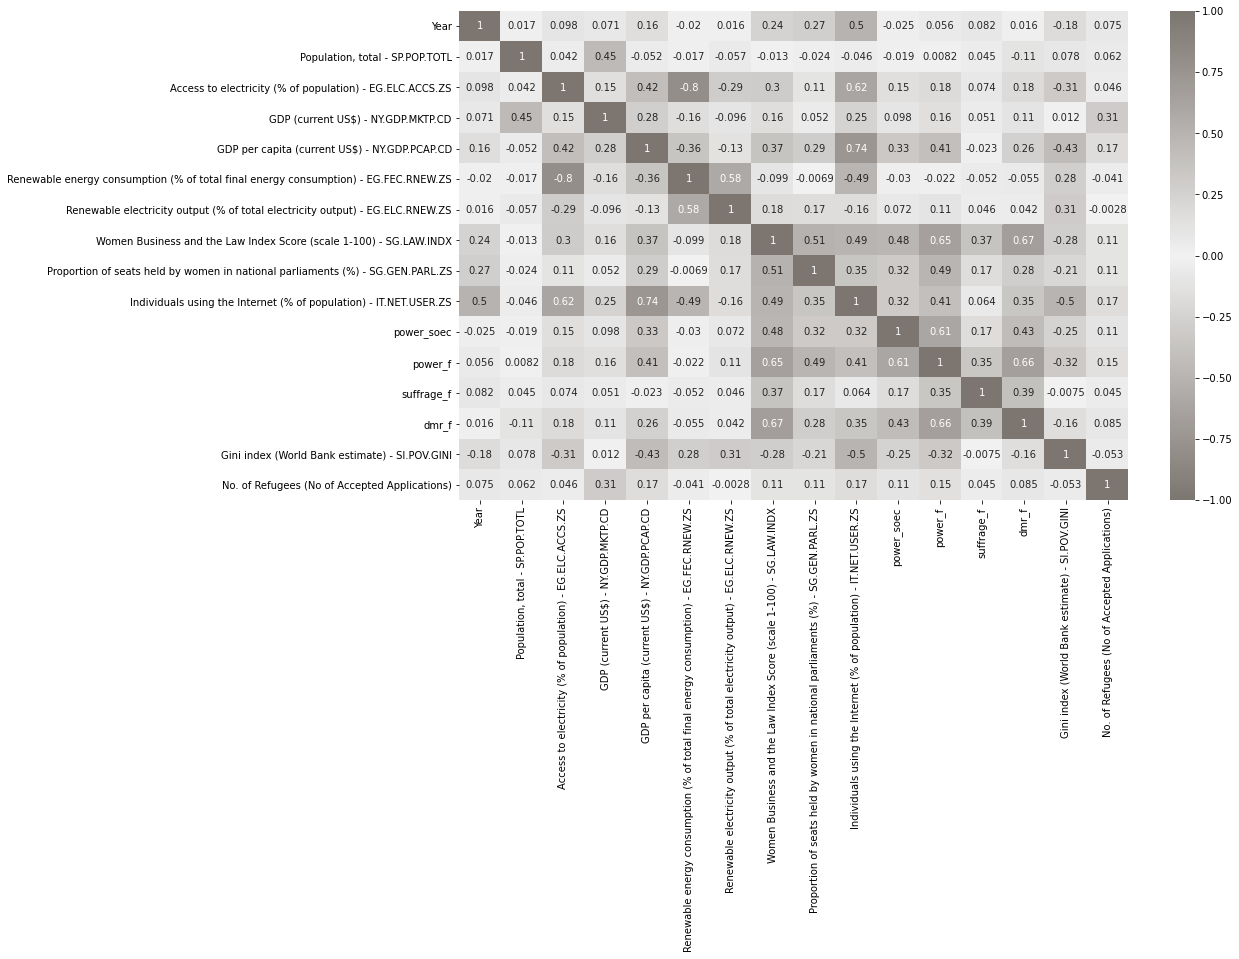

In [558]:
plt.figure(figsize=(15,9))
sym_col = sns.diverging_palette(50, 50, s=10, as_cmap=True)
sns.heatmap(inequality.corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)
plt.show()

9 million refugees placed between 2000-2020
nearly 5 million asylum seekers rejected between 2000-2020
Countries that took in the most refugees are Germany, America, France, Uganda, UK.
Countries that rejected most asylum seekers are France, Germany, UK, South Africa.

Correlation between columns and refugees intake are still all fairly low.
The more women in Parliament leads to a higher no of refugees being accepted, could be due to diverse politics/more compassion?
Countries with a smaller gini index will have less refugees per year.


Notes: 'Otherwise close' could mean migrant death but very broad and sweeping assumption to make.
Those rejected have their own column.

<Figure size 1080x1080 with 0 Axes>

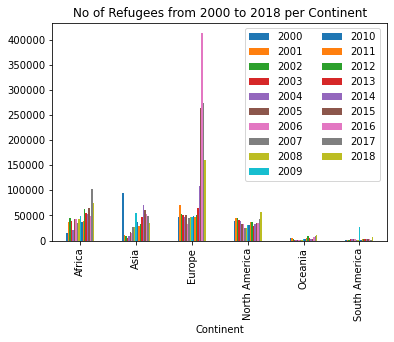

In [559]:
plt.figure(figsize=(15,15))
x = inequality.groupby(['Year','Continent'])['No. of Refugees (No of Accepted Applications)'].sum()
x.unstack(0).plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent')
plt.legend(loc="lower left", bbox_to_anchor=(0.56, 0.25), ncol= 2)
plt.show()

## Europe has taken in the most refugees and there is a spike in intakes in 2016
## Africa has more intakes than Asia
## North and South America and Oceania have low intakes

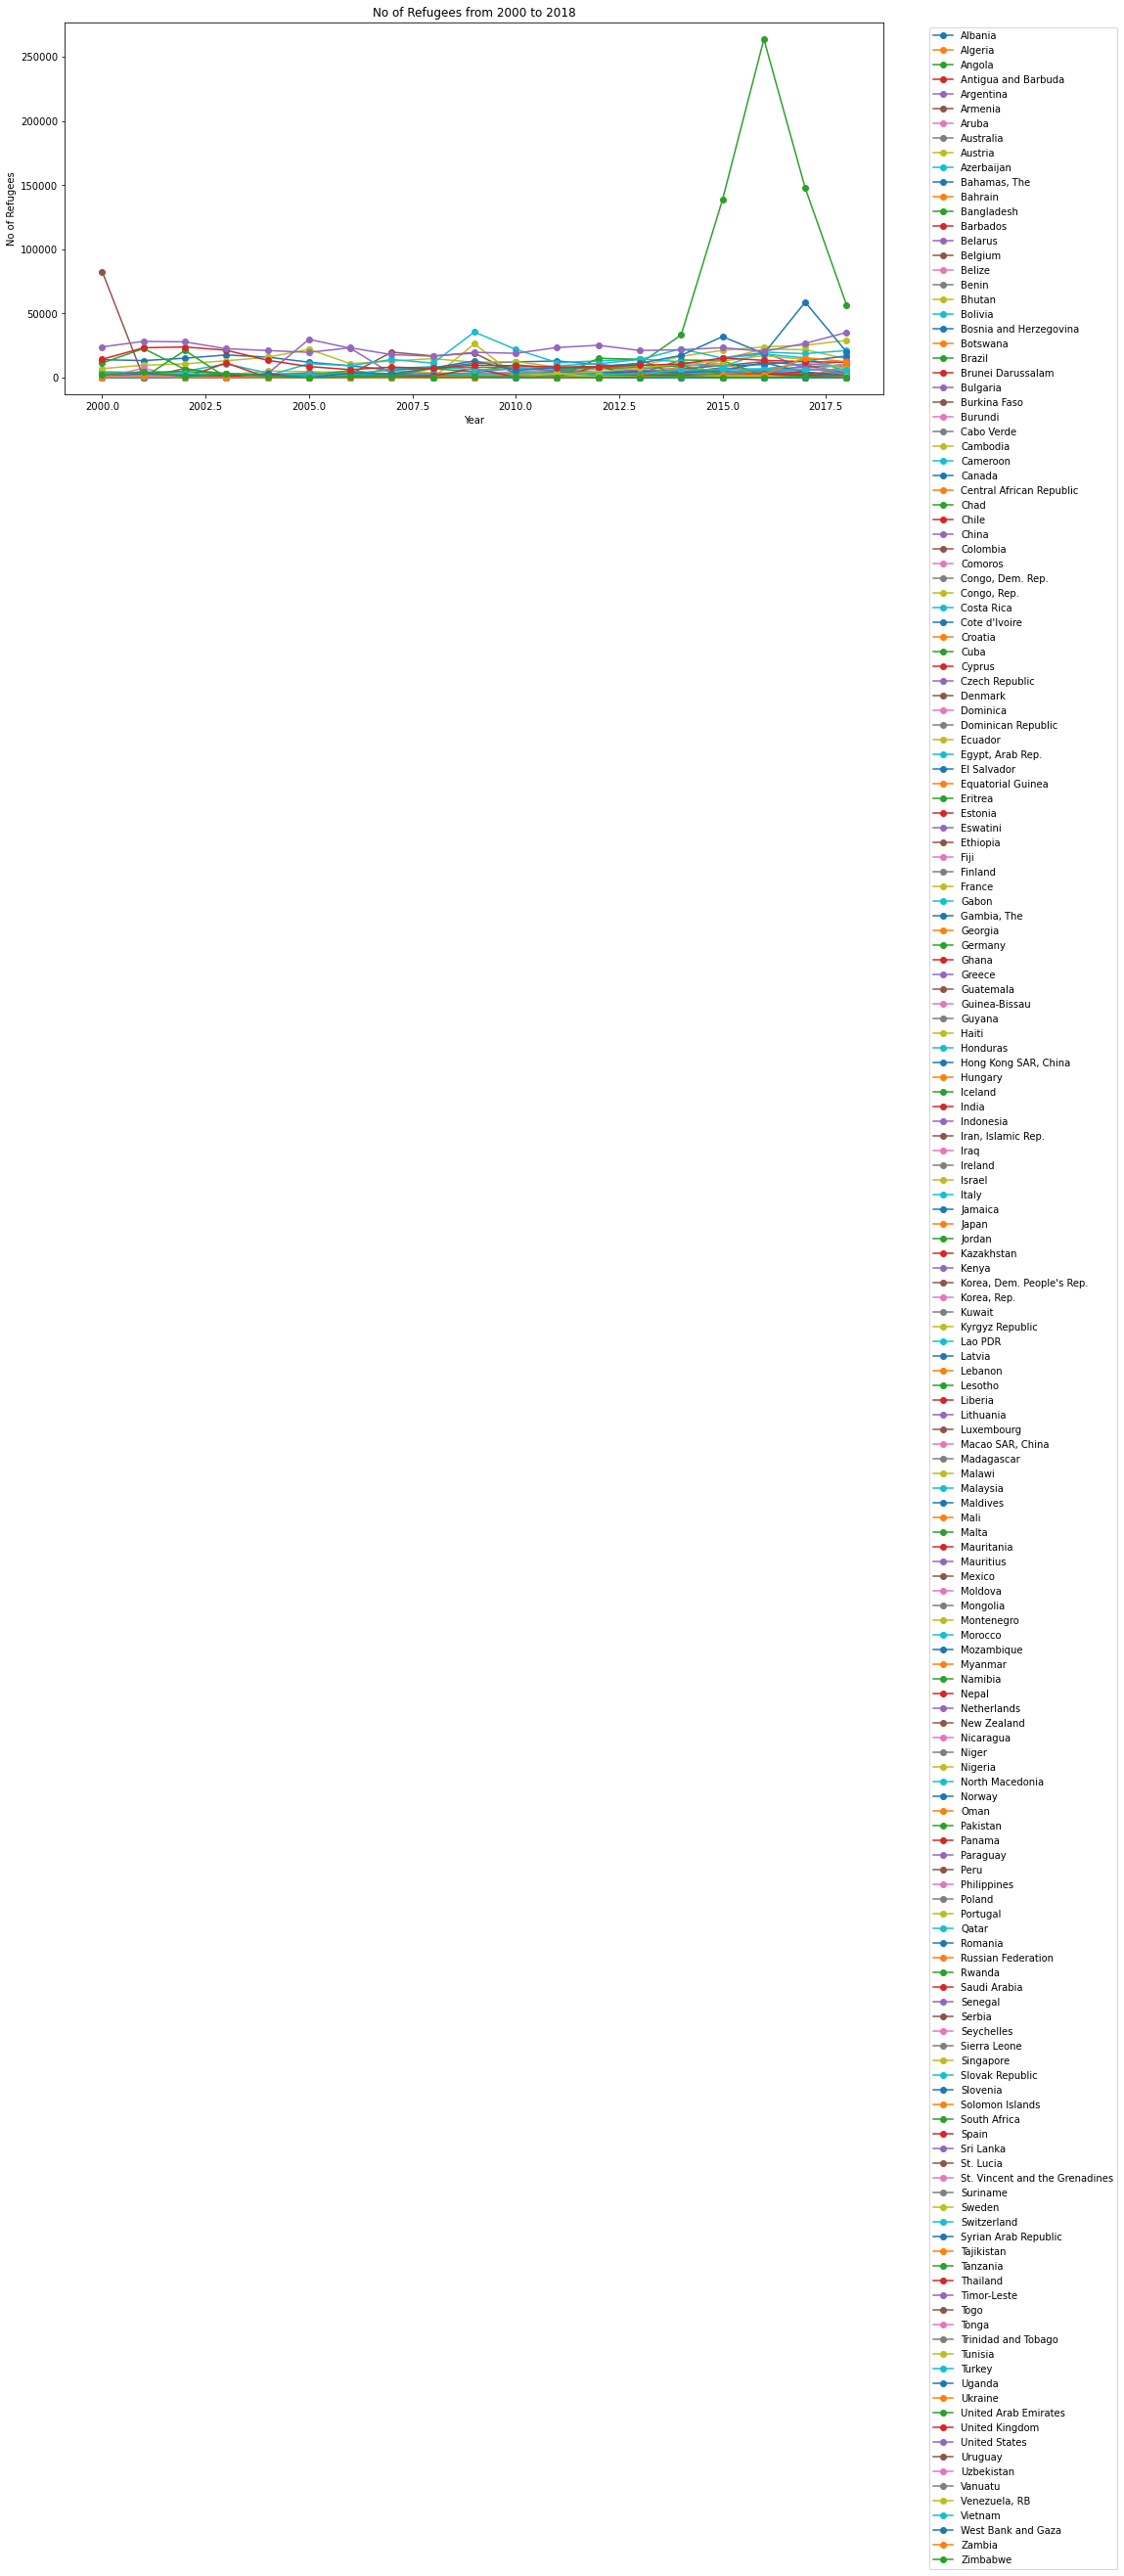

In [560]:
fig, ax = plt.subplots(figsize=(15,7))
inequality.groupby(['Year','Country Name'])['No. of Refugees (No of Accepted Applications)'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('No of Refugees from 2000 to 2018')
plt.ylabel('No of Refugees')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

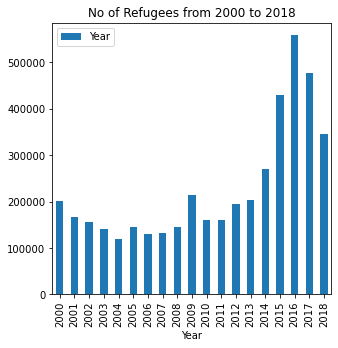

In [561]:
plt.figure(figsize=(5,5))
x = inequality.groupby('Year')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018')
plt.legend(['Year'],loc=2)
plt.show()

In [562]:
inequality['Continent'].unique()

array(['North America', 'Africa', 'Europe', 'Asia', 'South America',
       'Oceania'], dtype=object)

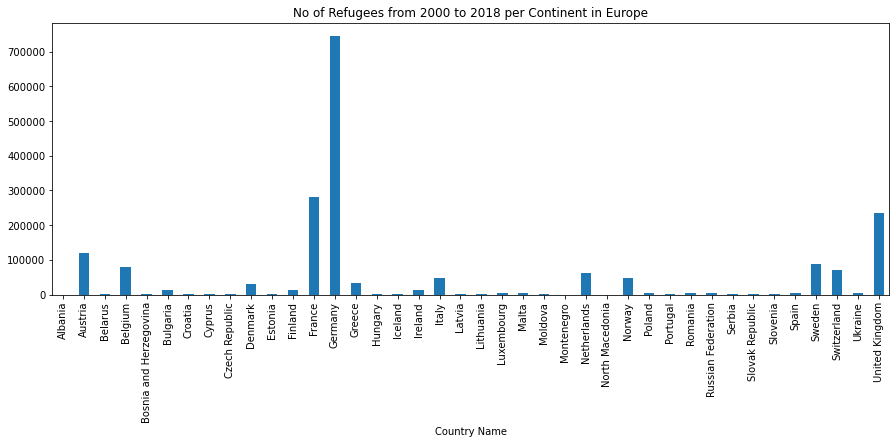

In [566]:
plt.figure(figsize=(15,5))
x = inequality[inequality['Continent']=='Europe']
x = x.groupby('Country Name')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent in Europe')
plt.show()

## Germany has the most intake of refugees out of Europe

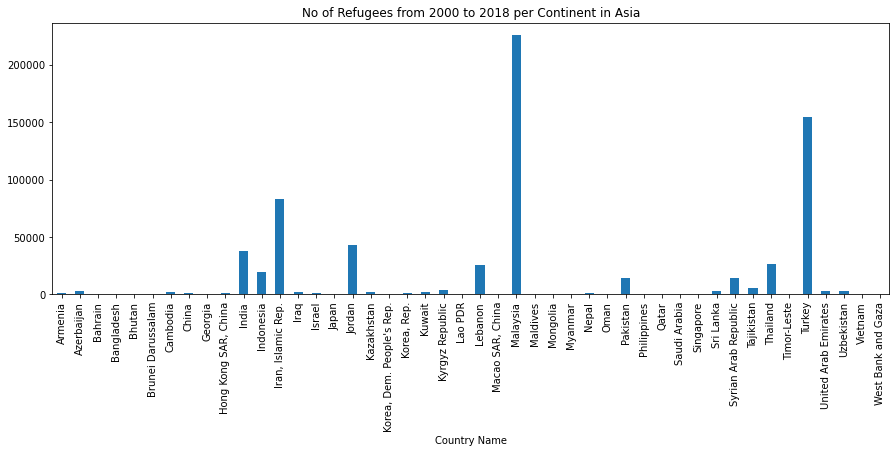

In [565]:
plt.figure(figsize=(15,5))
x = inequality[inequality['Continent']=='Asia']
x = x.groupby('Country Name')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent in Asia')
plt.show()

## Malaysia has the most intake of refugees out of Asia

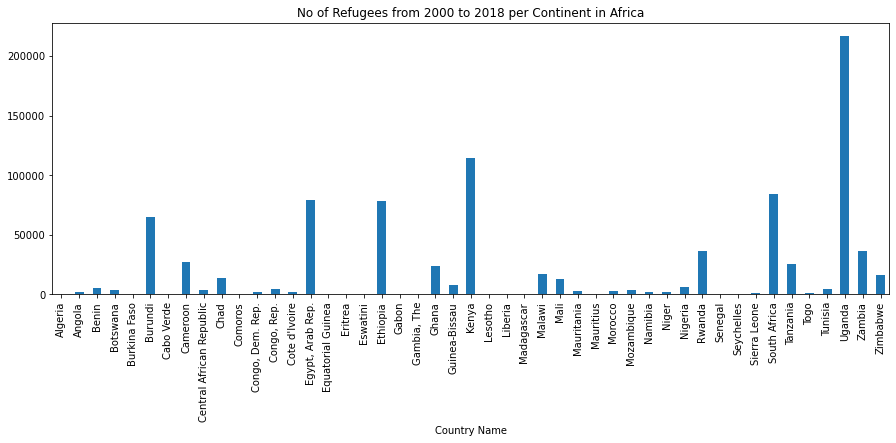

In [567]:
plt.figure(figsize=(15,5))
x = inequality[inequality['Continent']=='Africa']
x = x.groupby('Country Name')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent in Africa')
plt.show()

## Uganda has the most intake of refugees out of Africa

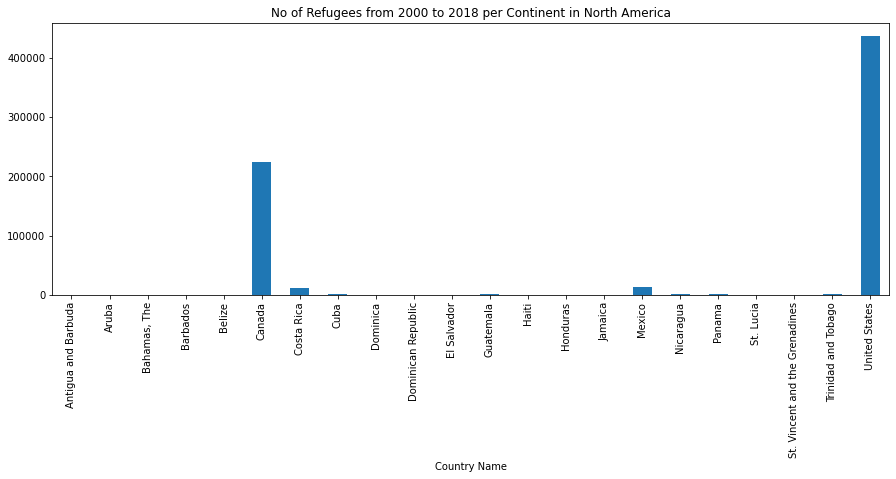

In [568]:
plt.figure(figsize=(15,5))
x = inequality[inequality['Continent']=='North America']
x = x.groupby('Country Name')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent in North America')
plt.show()

## United States has the most intake of refugees out of North America

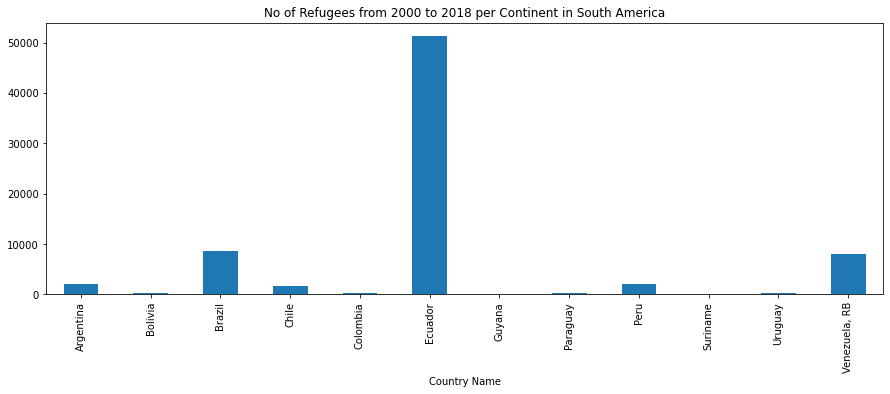

In [569]:
plt.figure(figsize=(15,5))
x = inequality[inequality['Continent']=='South America']
x = x.groupby('Country Name')['No. of Refugees (No of Accepted Applications)'].sum()
x.plot.bar()
plt.title('No of Refugees from 2000 to 2018 per Continent in South America')
plt.show()

## Ecuador has the most intake of refugees out of South America